# UFC Dataset
Source: [UFC-Fight historical data from 1993 to 2021](https://www.kaggle.com/datasets/rajeevw/ufcdata) (by RAJEEV WARRIER, Kaggle)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

#Importing from sklearn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression    # Importing Model Type from Linear_model
from sklearn.linear_model import LogisticRegression  #Logistic Model
from sklearn.model_selection import KFold, train_test_split # Splitting the data into train and test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score    #Common Evaluation Metrics - MAE, MSE, RMSE,R2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB # Naive Bayes Model
from sklearn.preprocessing import StandardScaler

## For KNN model
from sklearn.neighbors import KNeighborsClassifier 

# Unlike the earlier imports we're just importing the functions we need
# from scikit-learn. This will save on memory.
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# For decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
## Visualization for decision tree and random forest model
from sklearn import tree

import sys

### Make sure the package graphviz is installed through Anaconda prompt or CMD with the following: 
#conda install python-graphviz
#pip install graphviz

import graphviz

import warnings
warnings.filterwarnings('ignore')

# Outline:
## · 1. Data Processing
## · 2. Exploratory Data Analysis
## · 3. Model Walkthrough
### &nbsp; &nbsp; · 3.1 K Nearest Neighbors
### &nbsp; &nbsp; · 3.2 Decision Tree
### &nbsp; &nbsp; · 3.3 Random Forest
### &nbsp; &nbsp; · 3.4 Logistic Regression (Feature Selection & PCA)
### &nbsp; &nbsp; · 3.5 Gaussian Naive Bayes

## 1. Data Preprocessing

In [2]:
UFC = pd.read_csv('preprocessed_data.csv') #import obtained dataset 'preprocessed_data.csv'
UFC #5902 rows × 160 columns

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5898,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
5899,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0
5900,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,1,0,0,0


In [3]:
UFC.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.193739,0.135246,0.452788,0.432788,0.282610,0.252897,0.400956,0.335873,0.120343,0.108563,...,0.001525,0.764825,0.000678,0.193155,0.039817,0.002542,0.759065,0.000339,0.205015,0.033040
std,0.346475,0.294238,0.114325,0.116189,0.239811,0.235253,0.648117,0.586483,0.307538,0.289504,...,0.039024,0.424144,0.026027,0.394807,0.195546,0.050354,0.427687,0.018407,0.403747,0.178755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.401611,0.376250,0.100000,0.082733,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.250000,0.093750,0.500000,0.480000,0.395828,0.330000,0.500000,0.500000,0.031250,0.007820,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#wide format -> long format

#Convert weight_class related variables into one column
weight_class = []
for i in range(len(UFC.columns)):
    if UFC.columns[i].startswith('weight_'):
        weight_class.append(i)
        
temp = UFC.iloc[:, weight_class]
temp['ID'] = list(range(5902))
temp = temp.melt(id_vars = 'ID', 
                 value_vars = ["weight_class_Bantamweight","weight_class_CatchWeight","weight_class_Featherweight",
                               "weight_class_Flyweight","weight_class_Heavyweight","weight_class_LightHeavyweight",
                               "weight_class_Lightweight","weight_class_Middleweight","weight_class_OpenWeight",
                               "weight_class_Welterweight","weight_class_WomenBantamweight","weight_class_WomenFeatherweight",
                               "weight_class_WomenFlyweight","weight_class_WomenStrawweight"])
temp = temp[temp.value != 0]

Weight_Class = list(temp['variable'])
for i in range(len(Weight_Class)):
    Weight_Class[i] = Weight_Class[i][13:]
    
UFC = UFC.drop(UFC.columns[weight_class], axis = 1)
UFC['Weight_Class'] = Weight_Class

In [5]:
#wide format -> long format

#Convert B_Stance related variables into one column
Bstance = []
for i in range(len(UFC.columns)):
    if UFC.columns[i].startswith('B_Stance_'):
        Bstance.append(i)
        
temp = UFC.iloc[:, Bstance]
temp['ID'] = list(range(5902))
temp = temp.melt(id_vars = 'ID', 
                 value_vars = ["B_Stance_Open Stance","B_Stance_Orthodox","B_Stance_Sideways",
                              "B_Stance_Southpaw","B_Stance_Switch"])
temp = temp[temp.value != 0]

B_Stance = list(temp['variable'])
for i in range(len(B_Stance)):
    B_Stance[i] = B_Stance[i][9:]

UFC = UFC.drop(UFC.columns[Bstance], axis = 1)
UFC['B_Stance'] = B_Stance

In [6]:
#wide format -> long format

#Convert R_Stance related variables into one column
Rstance = []
for i in range(len(UFC.columns)):
    if UFC.columns[i].startswith('R_Stance_'):
        Rstance.append(i)
        
temp = UFC.iloc[:, Rstance]
temp['ID'] = list(range(5902))
temp = temp.melt(id_vars = 'ID', 
                 value_vars = ["R_Stance_Open Stance","R_Stance_Orthodox","R_Stance_Sideways",
                              "R_Stance_Southpaw","R_Stance_Switch"])
temp = temp[temp.value != 0]

R_Stance = list(temp['variable'])
for i in range(len(R_Stance)):
    R_Stance[i] = R_Stance[i][9:]

UFC = UFC.drop(UFC.columns[Rstance], axis = 1)
UFC['R_Stance'] = R_Stance

In [7]:
#remove correlated variables
#pct = landed / att, landed & att highly correlated, drop att
att = []
for i in range(len(UFC.columns)):
    if UFC.columns[i].endswith('_att') or UFC.columns[i].endswith('_ATT'):
        att.append(i)
UFC = UFC.drop(UFC.columns[att], axis = 1)

#UFC.to_csv('UFC.csv', index=False) #save processed dataset

In [8]:
#categorical data -> numeric
UFC = pd.read_csv('UFC.csv')

# Winner: Red -> 1, Blue -> 0
Winner = UFC[['Winner']] #save this for EDA section
UFC[['Winner']] = np.where(UFC[['Winner']] == 'Red', 1, 0)

# title_bout: True -> 1, False -> 0
UFC[['title_bout']] = np.where(UFC[['title_bout']] == True, 1, 0)

# Weight_Class
UFC[['Weight_Class']] = le.fit_transform(UFC[['Weight_Class']])

# B_Stance
UFC[['B_Stance']] = le.fit_transform(UFC[['B_Stance']])

# R_Stance
UFC[['R_Stance']] = le.fit_transform(UFC[['R_Stance']])

#UFC.to_csv('UFC_new.csv', index=False) #save label encoded dataset

In [9]:
UFC #final dataset

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_REV,B_avg_opp_REV,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Weight_Class,B_Stance,R_Stance
0,1,0,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.00,0.0,...,0,0,170.18,177.80,135.0,31.0,27.0,0,0,0
1,1,0,0.500000,0.0,0.660000,0.30500,0.300,0.50000,0.00,0.0,...,0,0,182.88,187.96,185.0,32.0,28.0,0,0,0
2,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,187.96,190.50,264.0,32.0,28.0,0,0,0
3,0,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,160.02,160.02,115.0,28.0,25.0,0,0,0
4,0,0,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.25,0.0,...,2,0,167.64,172.72,135.0,29.0,43.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,190.50,190.50,260.0,29.0,29.0,13,4,4
5898,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,177.80,177.80,170.0,29.0,29.0,13,4,4
5899,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,182.88,182.88,210.0,29.0,29.0,13,4,4
5900,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.00,0.0,...,0,0,187.96,187.96,225.0,29.0,30.0,13,4,4


#### Data Dictionary:
**Winner (Y Variable):** Red or blue               
**Weight_Class:** Weight division the fight belongs to          
**title_bout:**	Indicates if fight is for a title of a weight division               
*The following exists for both Red and Blue fighter of a fight (append "B_"/"R_" to below names):*           
**age:**	Age of Fighter          
**Stance:**	Fighter Stance, Style of fighting          
**avg_KD:**	Average Knockdowns in career          
**avg_opp_KD:**	Average Knockdowns by Opponents          
**avg_SIG_STR_pct:**	Average Significant Strikes %          
**avg_opp_SIG_STR_pct:**	Average Significant Strikes by Opponents %          
**avg_TD_pct:**	Average takedown %          
**avg_opp_TD_pct:**	Average takedowns by opponents %          
**avg_REV:**	Average Reversals          
**avg_opp_REV:**	Average Reversals by opponents          
**avg_SIG_STR_landed:**	Average Significant Strikes landed          
**avg_opp_SIG_STR_landed:**	Average Significant Strikes by opponents landed          
**avg_TOTAL_STR_landed:**	Average Total Strikes landed          
**avg_opp_TOTAL_STR_landed:**	Average Total Strikes by opponents landed          
**avg_TD_landed	Average:** Takedowns landed          
**avg_opp_TD_landed:**	Average Takedowns landed by opponents          
**avg_HEAD_landed:**	Average Headshots landed          
**avg_opp_HEAD_landed:**	Average Headshots landed by opponents          
**avg_BODY_landed:**	Average Bodyshots landed          
**avg_opp_BODY_landed:**	Average Bodyshots landed by opponents          
**avg_LEG_landed:**	Average Legshots landed          
**avg_opp_LEG_landed:**	Average Legshots landed by opponents          
**avg_DISTANCE_landed:**	Average Distance shots landed          
**avg_opp_DISTANCE_landed:**	Average Distance shots landed by opponents          
**avg_CLINCH_landed:**	Average Sig Strikes landed in Clinch          
**avg_opp_CLINCH_landed:**	Average Sig Strikes landed by opponents in Clinch          
**avg_GROUND_landed:**	Average Sig Strikes landed on ground          
**avg_opp_GROUND_landed:**	Average Sig Strikes landed by opponents on ground          
**avg_CTRL_time(seconds):**	Average Control time          
**avg_opp_CTRL_time(seconds):**	Average Control time by opponent          
**total_time_fought(seconds):**	Total time this fighter has spent fighting          
**total_rounds_fought:**	Total rounds this fighter has fought          
**total_title_bouts:**	Total count of how many Title fights fighter has been in          
**current_win_streak:**	Current Win Streak of fighter          
**current_lose_streak:**	Current Loss Streak of fighter          
**longest_win_streak:**	Fighter's longest Winning Streak          
**wins:**	How many Wins a fighter has          
**losses:**	How many losses a fighter has          
**draw:**	how many draws a fighter has          
**win_by_Decision_Majority:**	No. of wins by Majority Judges Decision          
**win_by_Decision_Split:**	No. of wins by Split Decision          
**win_by_Decision_Unanimous:**	No. of wins by Unanimous Judges Decision          
**win_by_KO/TKO:**	No. of wins by Knowckout or Technical Knockout (ref stopped)          
**win_by_Submission:**	No. of Wins by Submission          
**win_by_TKO_Doctor_Stoppage:**	Wins by Doctor Stoppage          
**Height_cms:**	Fighter's Height          
**Reach_cms:**	Fighter's Reach          
**Weight_lbs:**	Fighter's Weight          

## 2. Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'R_age'}>,
        <AxesSubplot:title={'center':'B_age'}>,
        <AxesSubplot:title={'center':'R_Height_cms'}>,
        <AxesSubplot:title={'center':'B_Height_cms'}>],
       [<AxesSubplot:title={'center':'R_Reach_cms'}>,
        <AxesSubplot:title={'center':'B_Reach_cms'}>,
        <AxesSubplot:title={'center':'R_wins'}>,
        <AxesSubplot:title={'center':'B_wins'}>],
       [<AxesSubplot:title={'center':'R_losses'}>,
        <AxesSubplot:title={'center':'B_losses'}>,
        <AxesSubplot:title={'center':'R_avg_KD'}>,
        <AxesSubplot:title={'center':'B_avg_KD'}>],
       [<AxesSubplot:title={'center':'R_Weight_lbs'}>,
        <AxesSubplot:title={'center':'B_Weight_lbs'}>,
        <AxesSubplot:title={'center':'R_avg_TOTAL_STR_landed'}>,
        <AxesSubplot:title={'center':'B_avg_TOTAL_STR_landed'}>],
       [<AxesSubplot:title={'center':'R_avg_SIG_STR_landed'}>,
        <AxesSubplot:title={'center':'B_avg_SIG_STR_landed'}>,
        <AxesS

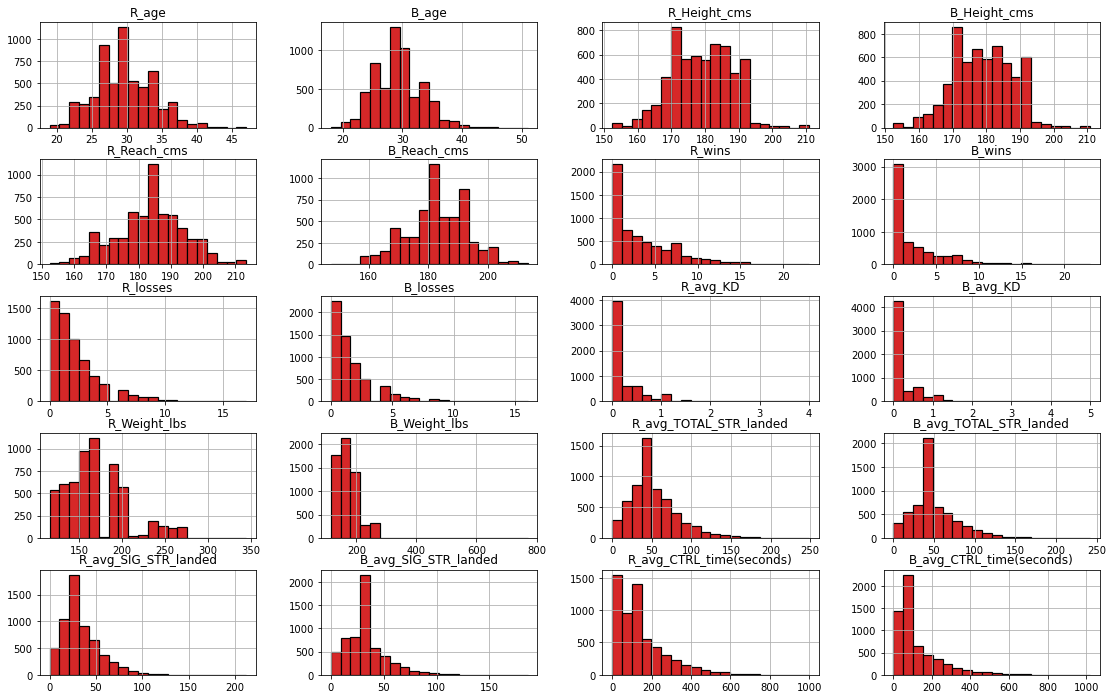

In [10]:
distribution = UFC[['R_age','B_age','R_Height_cms','B_Height_cms','R_Reach_cms','B_Reach_cms','R_wins','B_wins','R_losses','B_losses'
           ,'R_avg_KD','B_avg_KD','R_Weight_lbs','B_Weight_lbs','R_avg_TOTAL_STR_landed','B_avg_TOTAL_STR_landed','R_avg_SIG_STR_landed','B_avg_SIG_STR_landed'
          ,'R_avg_CTRL_time(seconds)','B_avg_CTRL_time(seconds)']]

distribution.hist(edgecolor='black',bins=20, linewidth=1.2, figsize=(19, 12),color='tab:red')

Winner
Red       3979
Blue      1923
dtype: int64

[Text(0, 0, 'Red'), Text(1, 0, 'Blue')]

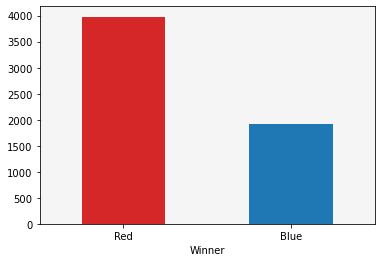

In [11]:
#Imbalanced Y variable data
ax = plt.axes()
ax.set_facecolor("whitesmoke")

display(Winner.value_counts())
Winner.value_counts().plot(kind='bar', rot=0,color = ['tab:red','tab:blue'])
ax.set_xticklabels(['Red','Blue'])

<AxesSubplot:>

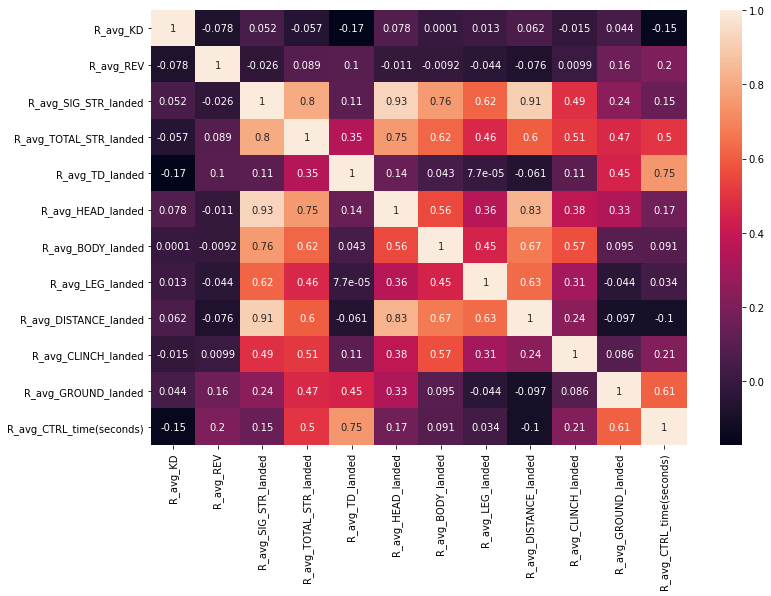

In [12]:
#correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(UFC.loc[:,["R_avg_KD","R_avg_REV","R_avg_SIG_STR_landed","R_avg_TOTAL_STR_landed",
                       "R_avg_TD_landed","R_avg_HEAD_landed","R_avg_BODY_landed","R_avg_LEG_landed",
                       "R_avg_DISTANCE_landed","R_avg_CLINCH_landed","R_avg_GROUND_landed",
                       "R_avg_CTRL_time(seconds)"]].corr(), annot = True)

#### K-means clustering

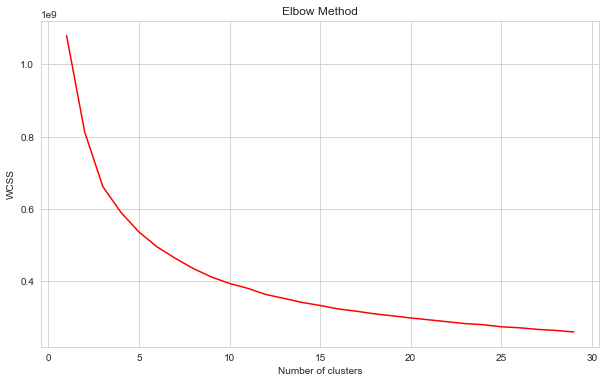

In [13]:
#K-means clustering
wcss = [] #Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

#finding the Optimum number of Clusters:
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(UFC.iloc[:,1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
plt.plot(range(1, 30), wcss,"r-")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 3. Model Walkthrough

In [14]:
# obtain training set & testing set
X = UFC.iloc[:,1:]
y = UFC[['Winner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, pred)
        TN=cm[0,0]
        TP=cm[1,1]
        FN=cm[1,0]
        FP=cm[0,1]
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {cm}\n")
        
        print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
        print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),4))

        # Plot
        plt.figure(figsize = (8,6))
        sns.set(font_scale=1.4)
        conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:Blue','Predicted:Red'],index=['Actual:Blue','Actual:Red'])
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="OrRd")
        plt.show()

### 3.1 K Nearest Neighbors

In [16]:
# creating a list of K for KNN
#The model will consider K values from 1 till 100 with an interval of 5 
k_list = list(range(1,100,5))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [17]:
# Find the optimal number of neighbors
optimal_index = cv_scores.index(max(cv_scores))
optimal_neighbors = k_list[optimal_index]
optimal_neighbors

91

<Figure size 432x288 with 0 Axes>

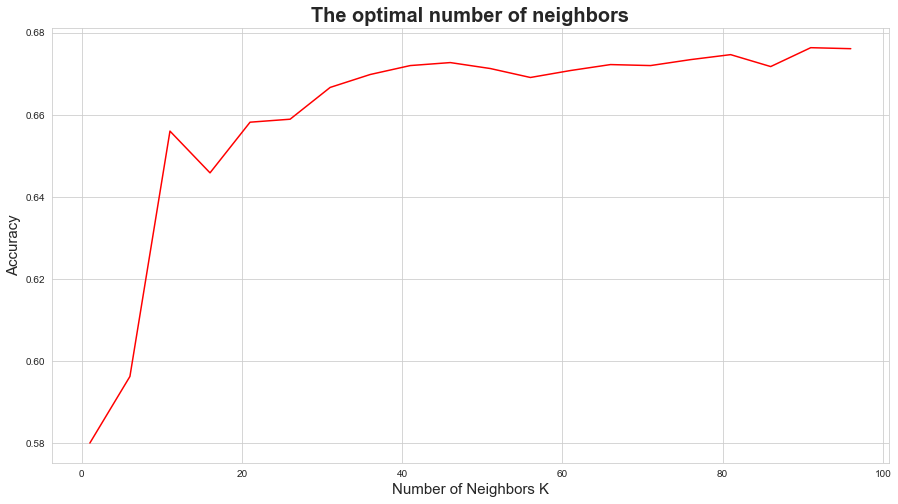

In [18]:
# KNN visualization
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(15,8))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores,color='red')
plt.show()

Test Result:

accuracy score: 0.6702428006775832

Classification Report: 
 	Precision: 0.6758620689655173
	Recall Score: 0.9832775919732442
	F1 score: 0.8010899182561307

Confusion Matrix: 
 [[  11  564]
 [  20 1176]]

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9833
Specificity or True Negative Rate = TN/(TN+FP) =  0.0191


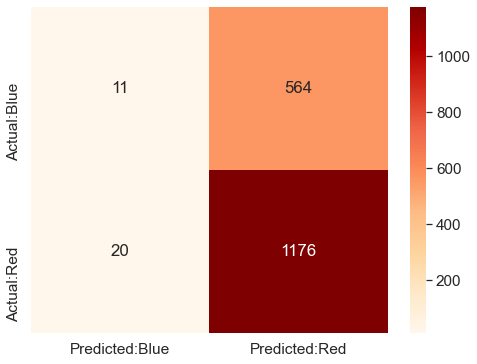

In [19]:
#Building a basic KNN model with optimal
classifier = KNeighborsClassifier(n_neighbors=optimal_neighbors)

# Fitting the model
Model_KNN = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier.predict(X_test)

print_score(classifier, X_train, y_train, X_test, y_test, train=False)

### 3.2 Decision Tree

In [20]:
#Fitting Decision Tree model using DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Test Result:

accuracy score: 0.6064370412196499

Classification Report: 
 	Precision: 0.709487825356843
	Recall Score: 0.7065217391304348
	F1 score: 0.7080016757436114

Confusion Matrix: 
 [[229 346]
 [351 845]]

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.7065
Specificity or True Negative Rate = TN/(TN+FP) =  0.3983


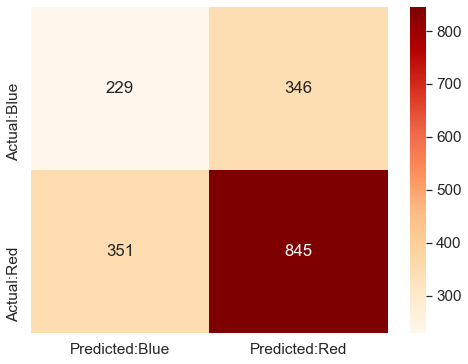

In [21]:
#Evaluating decision tree model
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [22]:
# Decision Tree Visualization
## text Visualization 
tree_model = tree_clf.fit(X_train, y_train)
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_97 <= 1.50
|   |--- feature_94 <= 33.50
|   |   |--- feature_93 <= 29.50
|   |   |   |--- feature_9 <= 34.09
|   |   |   |   |--- feature_59 <= 1.18
|   |   |   |   |   |--- feature_59 <= 1.08
|   |   |   |   |   |   |--- feature_45 <= 189.23
|   |   |   |   |   |   |   |--- feature_50 <= 0.61
|   |   |   |   |   |   |   |   |--- feature_29 <= 711.84
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- feature_50 <= 0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_50 >  0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.44
|   |   |   |   |   |   |   |   |   |   |--- feature_51 <= 0.26
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_51 >  0.26
|   |   |   |   |   |   |   

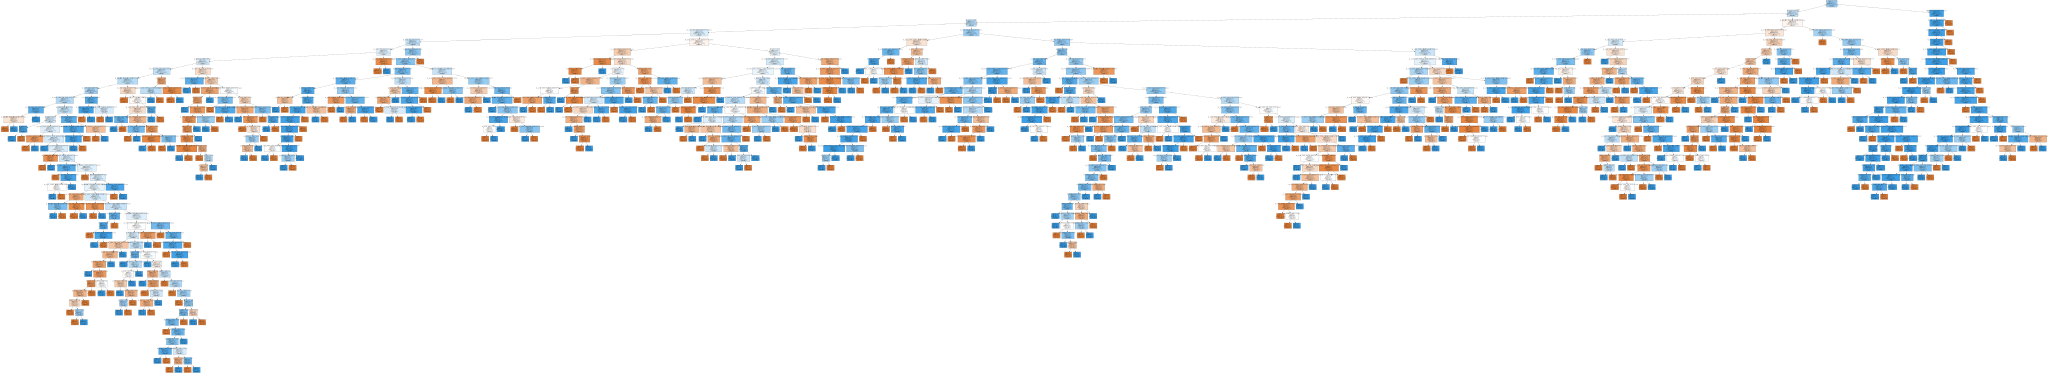

In [23]:
# Decision Tree Visualization
## DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Red","Blue"],
                                filled=True)
            
graph = graphviz.Source(dot_data, format="png") 
graph 
#The graph is shown in the slides

### 3.3 Random Forest

Test Result:

accuracy score: 0.6753246753246753

Classification Report: 
 	Precision: 0.705765407554672
	Recall Score: 0.8904682274247492
	F1 score: 0.7874306839186691

Confusion Matrix: 
 [[ 131  444]
 [ 131 1065]]

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8905
Specificity or True Negative Rate = TN/(TN+FP) =  0.2278


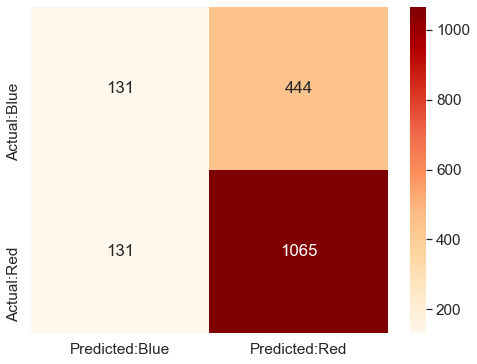

In [24]:
# Fitting the random forest model using RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42) # To overcome the imbalanced class weight,we used parameter 'class weight' to adjust it.
rf_clf.fit(X_train, y_train)

# Model Evaluation
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

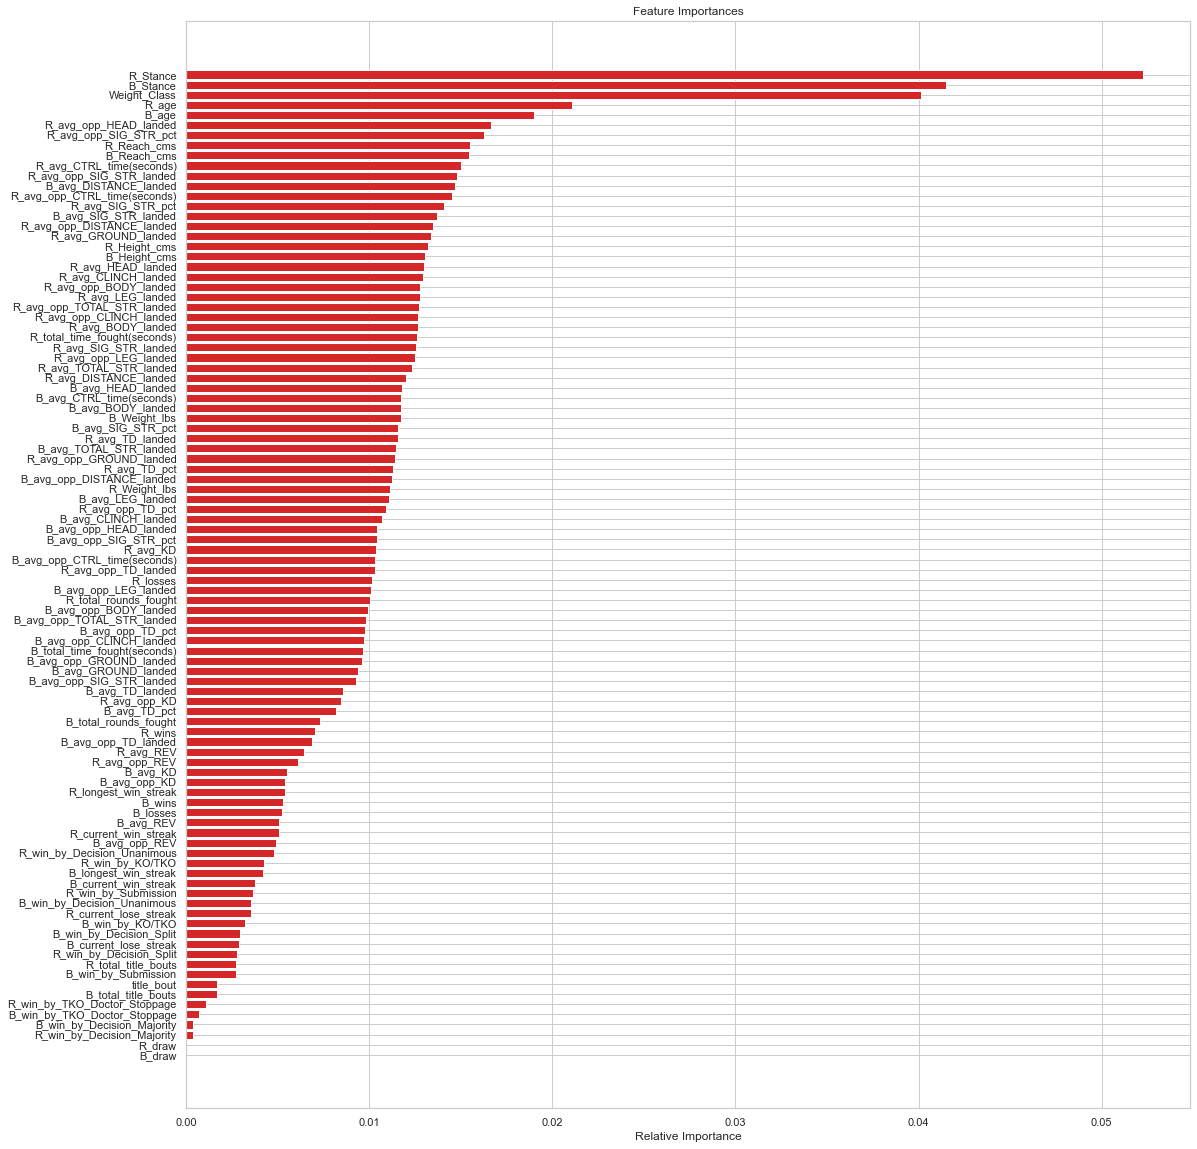

In [25]:
# Visualization for the Features Importance of Random Forest
forest_model = rf_clf.fit(X_train, y_train)
features = X.columns
importances = forest_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (18,20))
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='tab:red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 3.4 Logistic Regression (Feature Selection & PCA)

#### Dimensionality Reduction - Feature Selection

In [26]:
rfecv = RFECV(estimator = LogisticRegression(), step = 1, cv = 5, scoring = 'accuracy')
X = UFC.iloc[:,1:]
y = UFC[['Winner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
rfecv.fit(X_train, y_train.values.ravel())
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

Optimal number of features: 24
Selected features: ['title_bout', 'B_avg_opp_KD', 'B_avg_opp_TD_pct', 'B_avg_opp_SIG_STR_landed', 'B_avg_TD_landed', 'B_avg_opp_TD_landed', 'B_avg_opp_DISTANCE_landed', 'B_total_title_bouts', 'B_current_win_streak', 'B_win_by_TKO_Doctor_Stoppage', 'R_avg_opp_KD', 'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_TD_landed', 'R_avg_opp_TD_landed', 'R_total_title_bouts', 'R_current_lose_streak', 'R_longest_win_streak', 'R_losses', 'R_win_by_Decision_Split', 'B_age', 'R_age', 'B_Stance', 'R_Stance']


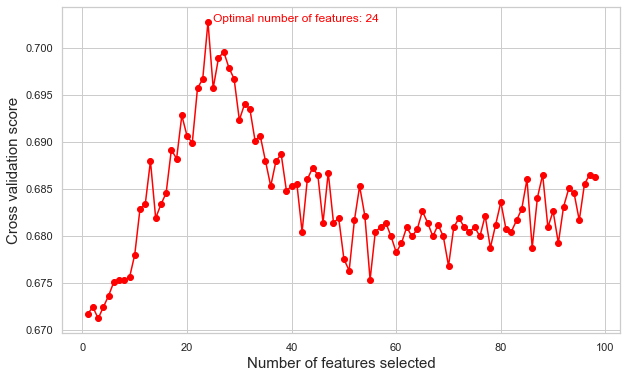

In [27]:
# plot: number of features selected - cross validation score on training set
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected",size = 15)
plt.ylabel("Cross validation score", size = 15)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='red', marker='o')
plt.text(25, rfecv.grid_scores_[23], "Optimal number of features: 24", size = 12, color='red')
plt.show()

In [28]:
print("Accuracy: ", rfecv.grid_scores_[23]) #highest accuracy obtained on the training set

Accuracy:  0.7027345842934144


#### Dimensionality Reduction - PCA

In [29]:
#two principal components
pca_df = UFC.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(pca_df) 
scaled_data = scaler.transform(pca_df)

pca = PCA(n_components = 2)
components = pca.fit_transform(scaled_data)

pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "Winner", UFC["Winner"].values, True)
pca_values_df

,Winner,Principal Component 1,Principal Component 2
0,1,-2.355167,-2.832506
1,1,0.341980,1.482141
2,1,-1.605663,0.989814
3,0,-1.109871,-4.644321
4,0,6.782828,-1.889258
...,...,...,...
5897,1,-4.056066,-0.563490
5898,1,-3.864540,-0.887507
5899,1,-4.198935,-0.043277
5900,1,-3.868948,-0.813209


In [30]:
pca_values_plt = pca_values_df.head(500)
sum(pca_values_plt['Winner'] == 1)

301

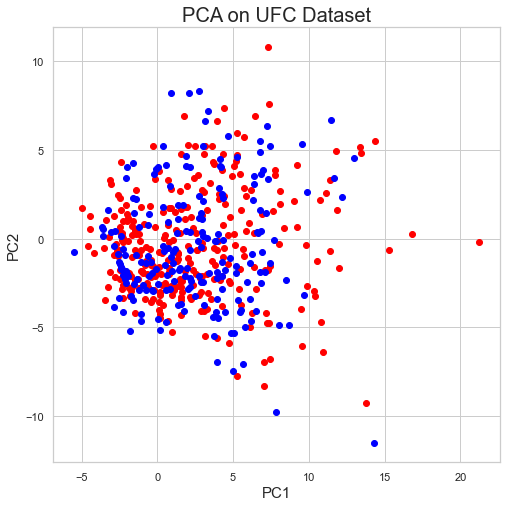

In [31]:
#visualization of 500 data points
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA on UFC Dataset', fontsize = 20)

pca_values_red = pca_values_plt.loc[pca_values_plt['Winner'] == 1,]
pca_values_blue = pca_values_plt.loc[pca_values_plt['Winner'] == 0,]

plt.scatter(pca_values_red['Principal Component 1'], pca_values_red['Principal Component 2'], color = 'red')
plt.scatter(pca_values_blue['Principal Component 1'], pca_values_blue['Principal Component 2'], color = 'blue')
plt.show()

#two classes not well separated

In [32]:
#number of principal components and the corresponding cumulative variance explained
pca = PCA(n_components = 60)
pca.fit(scaled_data)
ratio = pca.explained_variance_ratio_

cum_ratio = [0] 
for i in range(0,60):
    a = 0
    for j in range(0,i+1):
        a = a + ratio[j]
    cum_ratio.append(a)

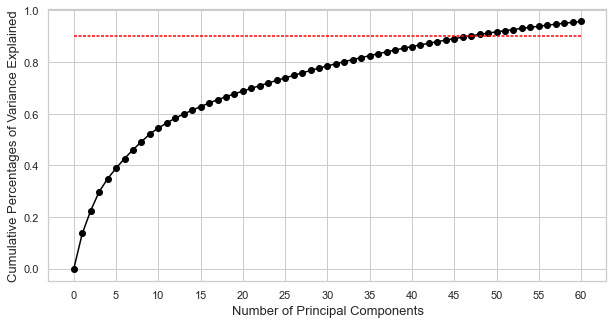

In [33]:
#plot to find the number of principal components to explain at least 90% variance
x_axes = range(0,61)
y_axes = cum_ratio
plt.figure(figsize=(10,5))
plt.plot(x_axes,y_axes,marker='o', color = 'black')
plt.xticks(range(0,61,5))
plt.xlabel('Number of Principal Components', size = 13)
plt.ylabel('Cumulative Percentages of Variance Explained', size = 13)
plt.plot([0, 60], [0.90, 0.90], dashes=[2, 1], color = 'red')
plt.show()

#### Imbalanced Dataset -> G-means score: choose optimal threshold

In [34]:
UFC['Winner'].value_counts()

1    3979
0    1923
Name: Winner, dtype: int64

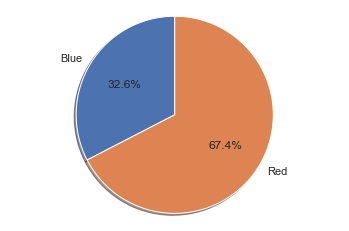

In [35]:
# Imbalanced Dataset
labels = 'Blue', 'Red'
sizes = [1923, 3979]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Classification Results - Selected Features

In [36]:
# use selected features
X_fs = UFC[['title_bout', 'B_avg_opp_KD', 'B_avg_opp_TD_pct', 'B_avg_opp_SIG_STR_landed', 'B_avg_TD_landed', 'B_avg_opp_TD_landed', 'B_avg_opp_DISTANCE_landed', 'B_total_title_bouts', 'B_current_win_streak', 'B_win_by_TKO_Doctor_Stoppage', 'R_avg_opp_KD', 'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_TD_landed', 'R_avg_opp_TD_landed', 'R_total_title_bouts', 'R_current_lose_streak', 'R_longest_win_streak', 'R_losses', 'R_win_by_Decision_Split', 'B_age', 'R_age', 'B_Stance', 'R_Stance']]
y_fs = UFC[['Winner']]
X_train, X_test, y_train, y_test = train_test_split(X_fs, y_fs, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
gmeans = np.sqrt(tpr * (1-fpr)) #geometric means
thresh = pd.DataFrame({"Thresholds": thresholds, "Gmeans": gmeans})
thresh

,Thresholds,Gmeans
0,1.994759,0.000000
1,0.994759,0.028831
2,0.987330,0.157917
3,0.987273,0.170569
4,0.986661,0.180053
...,...,...
648,0.272589,0.132410
649,0.250949,0.132631
650,0.234772,0.110967
651,0.231841,0.111013


In [37]:
# best threshold - maximum gmeans score
best = thresh.iloc[thresh['Gmeans'].idxmax(),:]
y_pred = (y_prob[:, 1] > best['Thresholds']).astype('float')
accuracy_score(y_test, y_pred)

0.6600790513833992

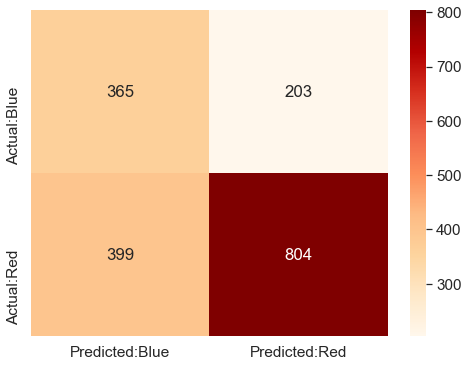

In [38]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Blue','Predicted:Red'],index=['Actual:Blue','Actual:Red'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="OrRd") #annot_kws={'size': 15}
plt.show()

In [39]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.668
Specificity or True Negative Rate = TN/(TN+FP) =  0.643


#### Classification Results - Principal Components

In [40]:
# use 50 principal components
pca_df = UFC.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(pca_df) 
scaled_data = scaler.transform(pca_df)

pca = PCA(n_components = 50, random_state = 0)
pca.fit(scaled_data)
components = pca.fit_transform(scaled_data)

pca_values_df = pd.DataFrame(data = components)
pca_values_df.insert(0, "Winner", UFC["Winner"].values, True)
pca_values_df

,Winner,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,1,-2.355168,-2.832494,3.034509,-1.760269,-2.284153,-1.004639,-3.928090,2.509156,-1.994820,...,-0.828663,0.004315,0.349199,0.160633,-0.939599,0.279591,-0.533346,-0.488039,-0.333183,-0.120958
1,1,0.341981,1.482132,-0.568608,0.979930,1.708405,-1.360504,0.726417,0.029718,-0.131140,...,0.734432,0.067347,-0.134440,-0.727923,0.408525,0.767737,0.381649,0.082501,0.218281,-0.493023
2,1,-1.605663,0.989807,0.175325,-2.323713,2.165728,-1.316035,1.481585,0.185707,-1.100907,...,0.285945,-0.280791,0.301276,0.239539,0.033118,-0.038693,-0.348664,0.035414,-0.183935,0.257712
3,0,-1.109871,-4.644301,-0.776797,1.804338,-1.898297,-3.323044,-1.851714,0.213427,0.679359,...,-0.477056,0.149395,0.147345,0.108881,0.415945,-0.012465,-0.213410,0.121955,-0.078364,0.462688
4,0,6.782826,-1.889188,-2.535264,-0.077663,-0.919998,1.462721,4.987821,1.647663,0.766067,...,0.377131,-0.897897,1.210686,0.192387,-0.739826,-0.065598,-0.717283,1.197087,-0.417955,-0.011684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,1,-4.056066,-0.563489,0.094656,0.179506,2.876318,1.005424,0.560722,0.284196,0.669379,...,-0.197775,0.162307,0.264380,-0.239520,0.035792,-0.193638,-0.023867,-0.178525,-0.425664,0.350463
5898,1,-3.864540,-0.887504,-0.029723,0.379966,2.412140,0.752827,0.374733,0.306099,0.669833,...,-0.431158,-0.164513,0.011099,-0.034482,-0.129838,0.225444,-0.026959,0.160613,-0.138957,-0.242911
5899,1,-4.198935,-0.043279,0.132180,-0.257965,3.486167,1.334211,0.874766,0.319915,0.515037,...,-0.372550,-0.208095,0.014933,-0.021677,-0.097340,0.226588,-0.072861,0.161138,-0.132883,-0.338874
5900,1,-3.868948,-0.813208,0.011162,0.321689,2.451452,0.779446,0.416233,0.292525,0.645463,...,-0.296677,0.051938,0.105259,-0.202783,-0.188738,-0.017739,0.073749,-0.005465,-0.296729,0.071191


In [41]:
X_pca = pca_values_df.iloc[:,1:]
y_pca = pca_values_df['Winner']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
gmeans = np.sqrt(tpr * (1-fpr)) #geometric means
thresh = pd.DataFrame({"Thresholds": thresholds, "Gmeans": gmeans})
thresh

,Thresholds,Gmeans
0,1.996178,0.000000
1,0.996178,0.028831
2,0.968783,0.306483
3,0.968585,0.306213
4,0.967036,0.319475
...,...,...
673,0.256596,0.102693
674,0.251902,0.102736
675,0.230832,0.083883
676,0.229618,0.083918


In [42]:
# best threshold - maximum gmeans score
best = thresh.iloc[thresh['Gmeans'].idxmax(),:]
y_pred = (y_prob[:, 1] > best['Thresholds']).astype('float')
accuracy_score(y_test, y_pred)

0.6606437041219649

In [43]:
# the false positive rate that corresponds to the optimal threshold
fpr[thresholds == best['Thresholds']]

array([0.33098592])

In [44]:
# the true positive rate that corresponds to the optimal threshold
tpr[thresholds == best['Thresholds']]

array([0.65752286])

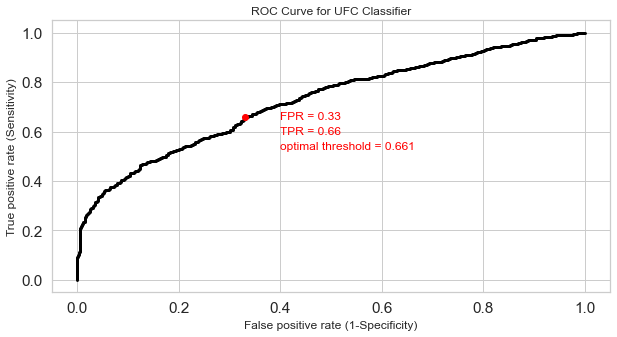

In [45]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(fpr,tpr, color = 'black', linewidth = 3)
plt.plot(fpr[thresholds == best['Thresholds']], tpr[thresholds == best['Thresholds']], marker='o', color = 'red')
plt.text(0.4, 0.65, "FPR = 0.33", size = 12, color='red')
plt.text(0.4, 0.59, "TPR = 0.66", size = 12, color='red')
plt.text(0.4, 0.53, "optimal threshold = 0.661", size = 12, color='red')
plt.title('ROC Curve for UFC Classifier', size = 12)
plt.xlabel('False positive rate (1-Specificity)', size = 12)
plt.ylabel('True positive rate (Sensitivity)', size = 12)
plt.show()

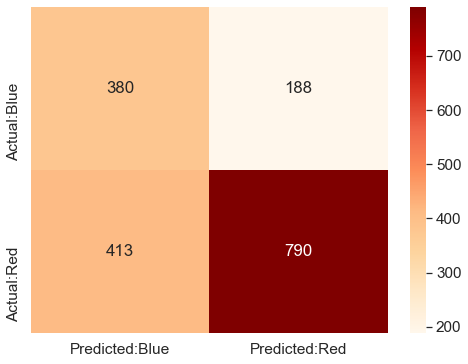

In [46]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Blue','Predicted:Red'],index=['Actual:Blue','Actual:Red'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="OrRd")
plt.show()

In [47]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.657
Specificity or True Negative Rate = TN/(TN+FP) =  0.669


· Similar accuracy / sensitivity / specificity                     
· Feature selection -> fewer variables, less computational time and complexity when analyzing a much larger dataset

### 3.5 Gaussian Naive Bayes

In [48]:
#principal components: independent, normally distributed
#suitable for Gaussian Naive Bayes model

pca_df = UFC.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(pca_df) 
scaled_data = scaler.transform(pca_df)

pca = PCA(n_components = 50, random_state = 0)
pca.fit(scaled_data)
components = pca.fit_transform(scaled_data)

pca_values_df = pd.DataFrame(data = components)
pca_values_df.insert(0, "Winner", UFC["Winner"].values, True)
pca_values_df

,Winner,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,1,-2.355168,-2.832494,3.034509,-1.760269,-2.284153,-1.004639,-3.928090,2.509156,-1.994820,...,-0.828663,0.004315,0.349199,0.160633,-0.939599,0.279591,-0.533346,-0.488039,-0.333183,-0.120958
1,1,0.341981,1.482132,-0.568608,0.979930,1.708405,-1.360504,0.726417,0.029718,-0.131140,...,0.734432,0.067347,-0.134440,-0.727923,0.408525,0.767737,0.381649,0.082501,0.218281,-0.493023
2,1,-1.605663,0.989807,0.175325,-2.323713,2.165728,-1.316035,1.481585,0.185707,-1.100907,...,0.285945,-0.280791,0.301276,0.239539,0.033118,-0.038693,-0.348664,0.035414,-0.183935,0.257712
3,0,-1.109871,-4.644301,-0.776797,1.804338,-1.898297,-3.323044,-1.851714,0.213427,0.679359,...,-0.477056,0.149395,0.147345,0.108881,0.415945,-0.012465,-0.213410,0.121955,-0.078364,0.462688
4,0,6.782826,-1.889188,-2.535264,-0.077663,-0.919998,1.462721,4.987821,1.647663,0.766067,...,0.377131,-0.897897,1.210686,0.192387,-0.739826,-0.065598,-0.717283,1.197087,-0.417955,-0.011684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,1,-4.056066,-0.563489,0.094656,0.179506,2.876318,1.005424,0.560722,0.284196,0.669379,...,-0.197775,0.162307,0.264380,-0.239520,0.035792,-0.193638,-0.023867,-0.178525,-0.425664,0.350463
5898,1,-3.864540,-0.887504,-0.029723,0.379966,2.412140,0.752827,0.374733,0.306099,0.669833,...,-0.431158,-0.164513,0.011099,-0.034482,-0.129838,0.225444,-0.026959,0.160613,-0.138957,-0.242911
5899,1,-4.198935,-0.043279,0.132180,-0.257965,3.486167,1.334211,0.874766,0.319915,0.515037,...,-0.372550,-0.208095,0.014933,-0.021677,-0.097340,0.226588,-0.072861,0.161138,-0.132883,-0.338874
5900,1,-3.868948,-0.813208,0.011162,0.321689,2.451452,0.779446,0.416233,0.292525,0.645463,...,-0.296677,0.051938,0.105259,-0.202783,-0.188738,-0.017739,0.073749,-0.005465,-0.296729,0.071191


In [49]:
X_pca = pca_values_df.iloc[:,1:]
y_pca = pca_values_df['Winner']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=0)

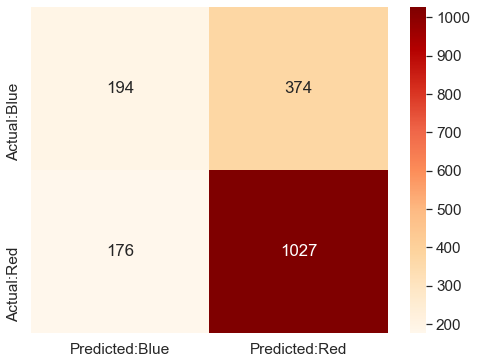

In [50]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Blue','Predicted:Red'],index=['Actual:Blue','Actual:Red'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="OrRd")
plt.show()

In [51]:
accuracy_score(y_test, y_pred)

0.6894409937888198

In [52]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.854
Specificity or True Negative Rate = TN/(TN+FP) =  0.342


#### End